In [1]:
import pandas as pd
import numpy as np


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

<h4 class="text-center"> Model Evaluation </h4>

###### Example of how model evaluation works

In [3]:
### For Dataset
from sklearn import datasets
from sklearn import metrics

### Cross Validate and Evaluate method
from sklearn.model_selection import KFold, cross_val_score

### Pipeline to automate task
from sklearn.pipeline import make_pipeline

### Scaler
from sklearn.preprocessing import StandardScaler

### Model
from sklearn.linear_model import LogisticRegression

In [4]:
#### Creating the dataset
digits = datasets.load_digits()

In [5]:
feature_digits = digits.data
feature_digits.shape

(1797, 64)

In [6]:
target_digits = digits.target
target_digits.shape

(1797,)

In [7]:
#### Scaler
scaler = StandardScaler()

In [8]:
### Model
logit = LogisticRegression(random_state=42)

In [9]:
### Pipeline to first scale the data and then apply logistic regression
first_pipeline  = make_pipeline( scaler, logit)

In [10]:
### Creating K-fold number for Cross Validation
kf = KFold(n_splits=10,shuffle=True,random_state=42)

In [11]:
kf

KFold(n_splits=10, random_state=42, shuffle=True)

In [12]:
# Evaluate with Cross_val_score
cv_results = cross_val_score( first_pipeline, feature_digits,target_digits, cv=kf, scoring='accuracy')

In [13]:
cv_results #n-splits =10

array([0.97777778, 0.97777778, 0.96666667, 0.95555556, 0.97222222,
       0.96666667, 0.96666667, 0.97206704, 0.96648045, 0.93296089])

In [14]:
cv_results.mean()

0.96548417132216

<h4 class="text-center"> Model Comparison </h4>

##### Datasets

In [15]:
boston = datasets.load_boston()

In [16]:
feature_boston, target_boston = boston.data, boston.target

In [17]:
feature_boston.shape, target_boston.shape

((506, 13), (506,))

###### Train_Test_Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(feature_boston,target_boston,test_size=0.1, random_state=42)

##### Dummy Regressor

In [20]:
from sklearn.dummy import DummyRegressor

In [21]:
dummy = DummyRegressor(strategy='mean')

In [22]:
dummy.fit(x_train,y_train)

DummyRegressor()

In [23]:
dummy.score(x_test,y_test)

-0.04122432859876257

##### LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [27]:
lin_reg.score(x_test,y_test)

0.7598135533532497

In [28]:
# we can comapre with dummy classifier to any classifier model too

<h4 class="text-center"> Evaluation Metrics </h4>

#### Evaluate the quality of the model

In [29]:
feature ,target = datasets.make_classification(n_samples=10000,n_features=3,n_informative=3,
                                               n_redundant=0,n_classes=2,random_state=42)

In [30]:
feature.shape, target.shape

((10000, 3), (10000,))

In [31]:
cross_val_score(logit,feature,target,scoring='accuracy',cv=3)

array([0.87582484, 0.87488749, 0.86108611])

In [32]:
cross_val_score(logit,feature,target,scoring='precision',cv=3)

array([0.87402985, 0.87878788, 0.86476653])

In [33]:
cross_val_score(logit,feature,target,scoring='recall',cv=3)

array([0.87822436, 0.86982603, 0.85594238])

In [34]:
cross_val_score(logit,feature,target,scoring='f1',cv=3)

array([0.87612208, 0.87428399, 0.86033183])

<h4 class="text-center"> Binary Classification Thresholds </h4>

##### ROC curve is one of the best method to check the evaluation quality

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

In [36]:
#creating dataset
feature, target = datasets.make_classification(n_samples=10000, n_features=10, n_classes=2,n_informative=3,random_state=42)

In [37]:
feature.shape, target.shape

((10000, 10), (10000,))

In [38]:
##### Train Test Split
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size =0.1, random_state=42)

In [39]:
#### Classifier
logit = LogisticRegression(random_state=42)

In [40]:
### Model Train
logit.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [46]:
### Prediction Probability
target_proba = logit.predict_proba(x_test)[:,1]

In [47]:
##### Creating True and False Positive Rate

In [48]:
false_positive_rate, true_positive_rate , threshold = roc_curve(y_test,target_proba)

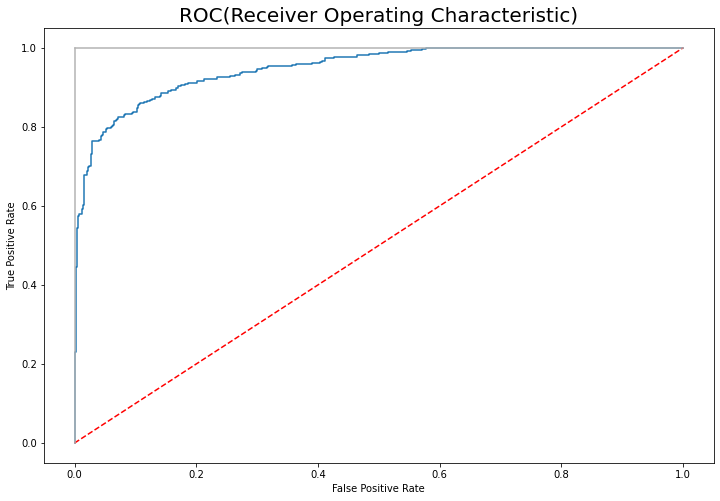

In [57]:
#### Creating a ROC CURVE
plt.figure(figsize=(12,8))
plt.title('ROC(Receiver Operating Characteristic)',fontsize=20)
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls='--' ,color='red')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [58]:
roc_auc_score(y_test,target_proba)

0.947406962785114

<h4 class="text-center"> MultiClass Prediction Evaluation </h4>

In [59]:
## Creating the dataset
feature,target = datasets.make_classification(n_samples=10000,n_features=3,n_informative=3,
                                             n_redundant=0 , n_classes =3 , random_state=42)

In [60]:
feature.shape,target.shape

((10000, 3), (10000,))

In [61]:
#Model
logit = LogisticRegression(random_state=42)

In [62]:
cross_val_score(logit, feature,target, scoring='accuracy')

array([0.761 , 0.7365, 0.7525, 0.7485, 0.7415])

In [63]:
#we can also use other metrics to evaluate multiclass Prediction

<h4 class="text-center"> Confusion Matrix </h4>

In [64]:
import seaborn as sns
sns.set(palette='Set1')

In [65]:
#creating the data
iris = datasets.load_iris()

In [66]:
feature,target =iris.data, iris.target

In [67]:
### target names

In [68]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
class_name = iris.target_names

###### Train_Test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size= 0.2 ,random_state=42)

In [71]:
# Model
logit = LogisticRegression(random_state=42)

In [72]:
logit.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [73]:
y_preds = logit.predict(x_test) #predicted  result

##### Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix

In [76]:
## Creating a dataFrame Using Confusion Matrix
data_confused = pd.DataFrame( confusion_matrix(y_test,y_preds), index=class_name , columns= class_name)
data_confused

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


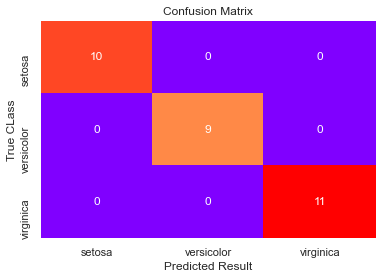

In [78]:
sns.heatmap(data_confused, annot=True, cbar=None, cmap='rainbow')
plt.title('Confusion Matrix')
plt.ylabel('True CLass')
plt.xlabel('Predicted Result')
plt.show()

<h4 class="text-center"> Evaluating Regresson Model </h4>

In [79]:
### Creating the dataset
feature, target = datasets.make_regression(n_samples=10000, n_features=3, n_informative=3, n_targets=1, noise=50,
                                          coef = False, random_state=42)

In [80]:
### Model
lin_reg = LinearRegression()

In [81]:
cross_val_score(lin_reg,feature,target, scoring= 'neg_mean_squared_error')

array([-2429.08804651, -2450.17306632, -2461.7824015 , -2577.98266713,
       -2493.43468152])

In [82]:
cross_val_score(lin_reg,feature,target, scoring= 'r2')

array([0.87107856, 0.86795863, 0.87142522, 0.86384287, 0.86828259])

In [83]:
# like classifiction metrics Regression model has some scoring paramater to use

<h4 class="text-center"> Evaluation Cluster Model </h4>

In [84]:
#creating dataset
feature, a = datasets.make_blobs(n_samples=1000,n_features=10,centers=2,cluster_std=0.5,shuffle=True,random_state=42)

In [85]:
feature.shape

(1000, 10)

In [86]:
#model
from sklearn.cluster import KMeans

In [87]:
model = KMeans(n_clusters=2,random_state=42)

In [88]:
model.fit(feature)

KMeans(n_clusters=2, random_state=42)

In [90]:
predicted_target = model.labels_

#### Score

In [91]:
from sklearn.metrics import silhouette_score

In [92]:
silhouette_score(feature,predicted_target)

0.86690631243991

<h4 class="text-center"> Custom Evaluation Metrics </h4>

In [93]:
# creating the dataset
feature, target = datasets.make_regression(n_samples=100, n_features=3, random_state=42)

In [94]:
## Train and test set
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

##### Custom Metrics

In [95]:
from sklearn.metrics import make_scorer, r2_score

In [96]:
def custom_metric(y_test,y_preds):
    r_2 = r2_score(y_test,y_preds)
    return r_2

In [97]:
score = make_scorer(custom_metric,greater_is_better=True)

##### Model

In [98]:
from sklearn.linear_model import Ridge

In [99]:
ridge =Ridge()

In [100]:
ridge.fit(x_train,y_train)

Ridge()

In [101]:
score(ridge,x_test,y_test)

0.9997747579184906

<h4 class="text-center"> Classification Report </h4>

In [103]:
feature = iris.data
target = iris.target
class_name = iris.target_names

In [104]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

In [105]:
logit = LogisticRegression(random_state=42)

In [106]:
logit.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [107]:
y_preds = logit.predict(x_test)

##### Classification Report 

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test,y_preds,target_names=class_name))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

